# 911 Calls Capstone 
Dataset from kaggle.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### top 5 zipcodes

In [5]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

#### top 5 townships (twp)

In [6]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

#### unique title

In [7]:
df['title'].nunique()

110

## Creating new features
#### Reason: to breif

In [8]:
df['Reason'] = list(df['title'].apply(
    lambda x: x.split(':')[0])
    )
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [9]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

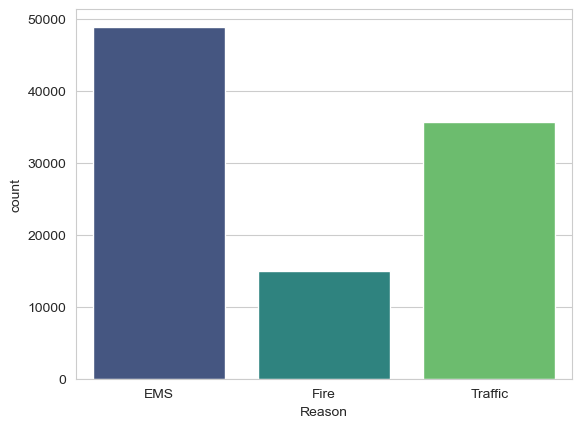

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Reason', data = df
             , palette = 'viridis', hue = 'Reason')
plt.show()

#### timeStamp: to datetime type
#### create Hour/Month/Day of Week/Date

In [11]:
type(df['timeStamp'].iloc[0])

str

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
time = df['timeStamp']
df['Hour'] = time.apply(lambda x: x.hour)
df['Month'] = time.apply(lambda x: x.month)
df['Day of Week'] = time.apply(lambda x: x.strftime('%a'))
df['Date'] = time.apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


#### Day of Week/Month seperate by Reason

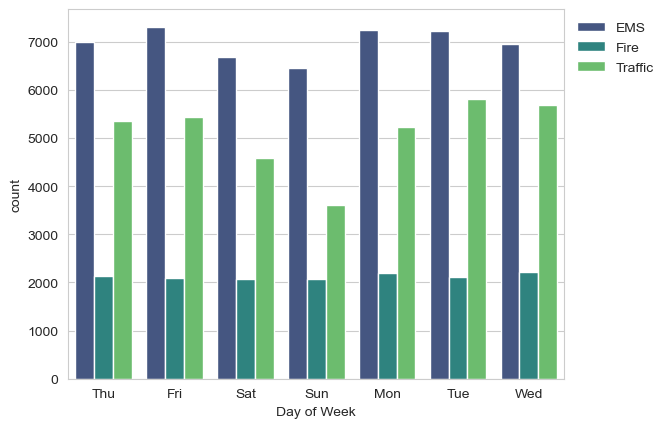

In [14]:
sns.countplot(x = 'Day of Week', data = df, 
             hue = 'Reason', palette = 'viridis')
plt.legend(loc = 2, bbox_to_anchor=(1, 1), 
           frameon=False)
plt.show()

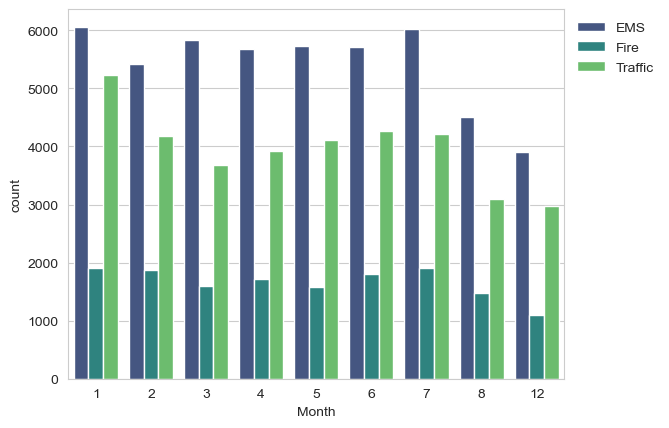

In [15]:
sns.countplot(x = 'Month', data = df, 
             hue = 'Reason', palette = 'viridis')
plt.legend(loc = 2, bbox_to_anchor=(1, 1), 
           frameon=False)
plt.show()

In [16]:
byMonth = df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


In [17]:
byMonth.isnull().count()

lat            9
lng            9
desc           9
zip            9
title          9
timeStamp      9
twp            9
addr           9
e              9
Reason         9
Hour           9
Day of Week    9
Date           9
dtype: int64

#### count of calls by month/date

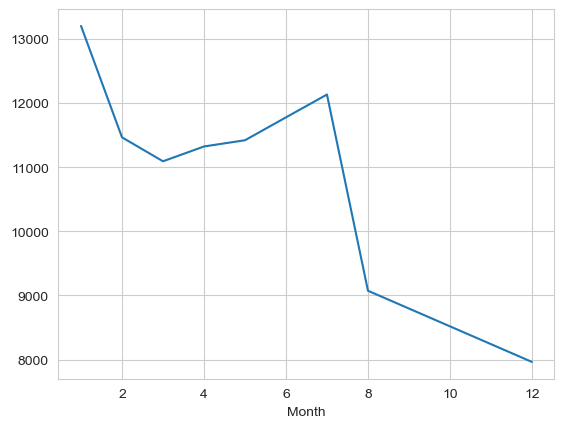

In [18]:
byMonth['twp'].plot()
plt.show()

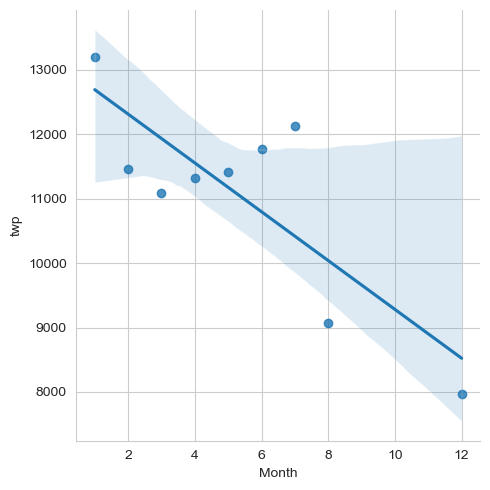

In [19]:
sns.lmplot(x='Month', y='twp', 
           data=byMonth.reset_index())
plt.show()

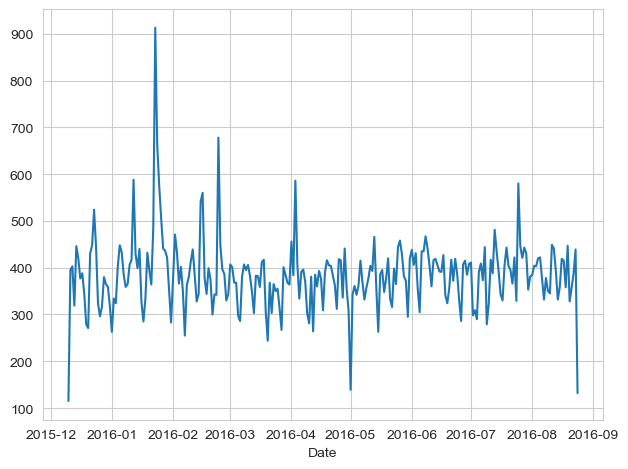

In [20]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.show()

#### count of calls seperate by reason

In [21]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp']

Date
2015-12-10     43
2015-12-11    141
2015-12-12    146
2015-12-13     78
2015-12-14    186
             ... 
2016-08-20    117
2016-08-21    138
2016-08-22    156
2016-08-23    151
2016-08-24     42
Name: twp, Length: 259, dtype: int64

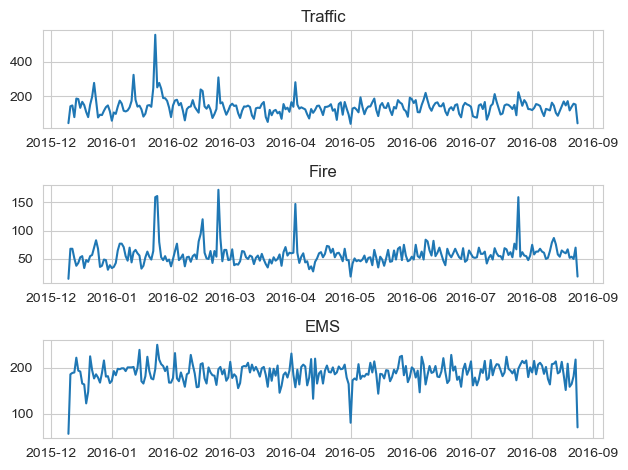

In [22]:
fig, axes = plt.subplots(nrows = 3, ncols = 1)

Traffic = df[df['Reason']=='Traffic'].groupby('Date').count()['twp']
Fire = df[df['Reason']=='Fire'].groupby('Date').count()['twp']
EMS = df[df['Reason']=='EMS'].groupby('Date').count()['twp']

axes[0].plot(Traffic)
axes[1].plot(Fire)
axes[2].plot(EMS)

axes[0].set_title('Traffic')
axes[1].set_title('Fire')
axes[2].set_title('EMS')

plt.tight_layout()
plt.show()

#### calls of hour and day of week

In [23]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


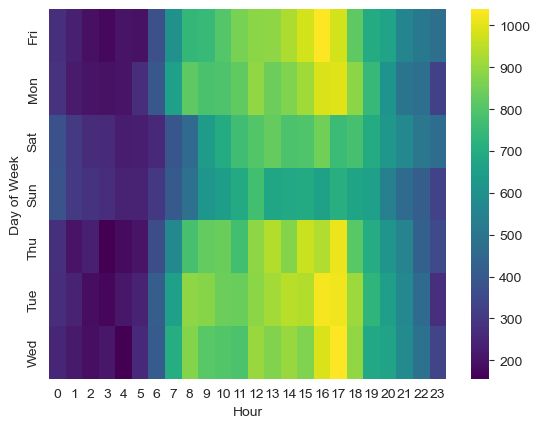

In [24]:
sns.heatmap(data = dayHour, cmap = 'viridis')
plt.show()

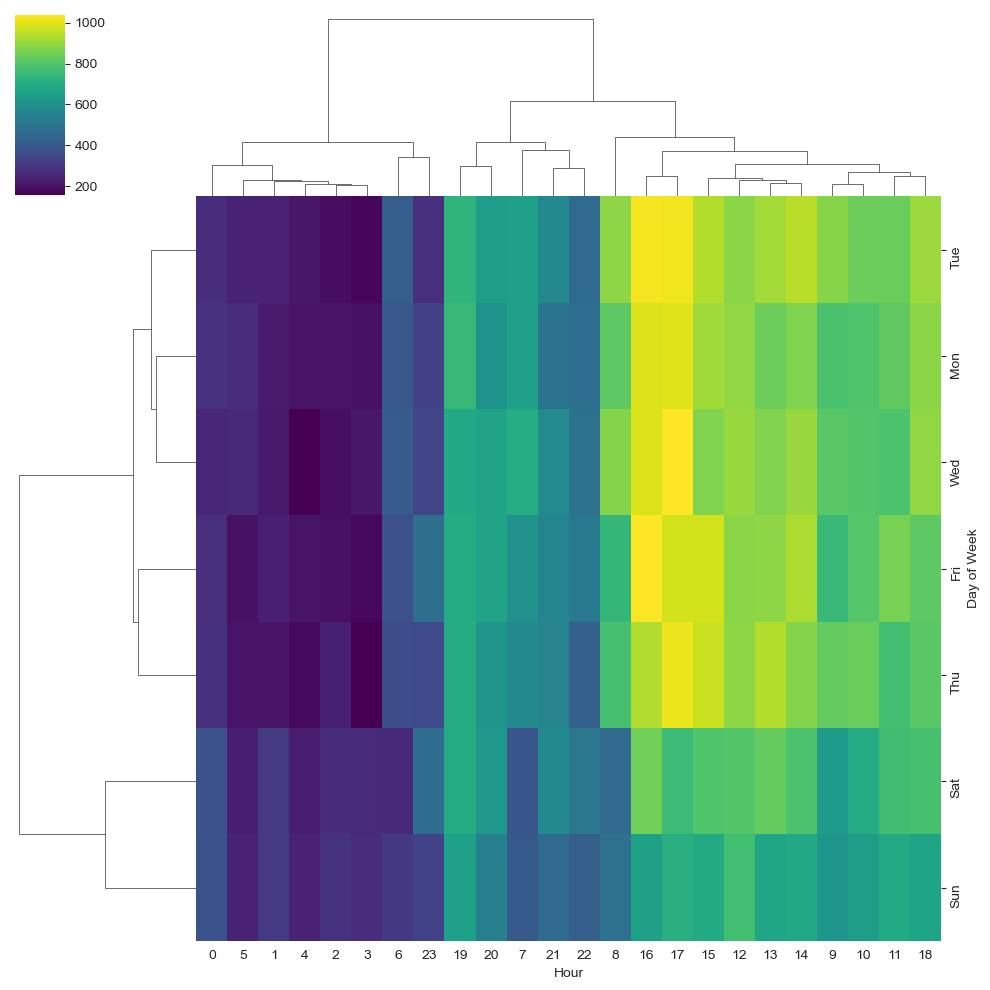

In [25]:
sns.clustermap(data = dayHour, cmap = 'viridis')
plt.show()

#### calls of Day of Week and month

In [26]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


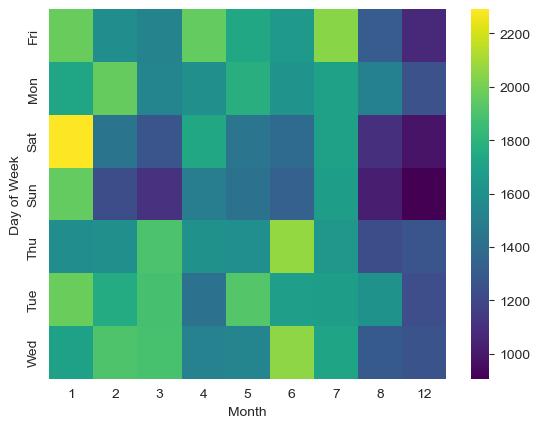

In [27]:
sns.heatmap(data = dayMonth, cmap = 'viridis')
plt.show()

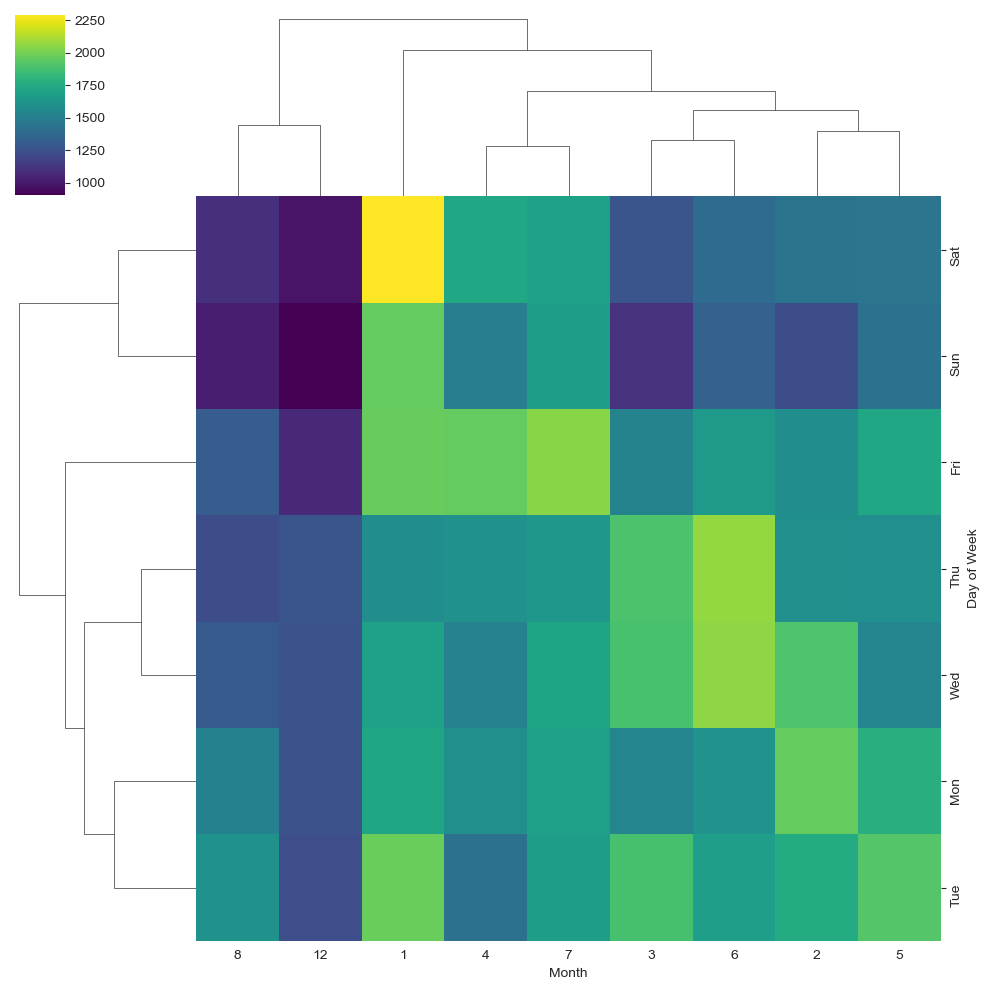

In [28]:
sns.clustermap(data = dayMonth, cmap = 'viridis')
plt.show()